In [1]:
#NOWAK STRONA 82 !! metoda polega na poszukiwaniu zbioru vektorów własnych (tj. macierz T) macierzy kowariancji Cx
# modelowanych, skolerowanych zmiennych losowych Xi
# dzięki temu możemy wylosować całkowicie nieskolerowane zmienne losowe Yi i przemnożyć Y * T by otrzymać losowy
# zestaw odpowiednio skoleoranych zmiennych Xi które stanowią wartości wsodowe punktów siatki pola losowego
import numpy as np
from numpy import linalg as LA
import math

In [2]:
sigmaXi=6.3 #odchylenie stand. każdej zmiennej Xi
meanXi=42.0 #średnia zmiennych Xi
ix=18 #liczba zmiennych losowych na kierunku X
iy=4 #liczba zmiennych losowych na kierunku Y
Cx=np.zeros((ix*iy,ix*iy)) #Cx to macierz kowariancji zmiennych losowych Xi
LcX=60 #długość belki
LcY=12 #szerokość belki (płyty)
deltaX=LcX/(ix+1) #lag distance X - odległości między zmiennymi wzdłuż mostu
deltaY=LcY/(iy+1) #lag distance Y - odległości poprzeczne
l_realiz=1#żądana liczba realizacji
print("odleglosci horyz =",deltaX)
ro=np.eye(ix*iy)
print("'pusta' macierz współczynników korelacji =")
print(ro)
print(deltaX,deltaY)

odleglosci horyz = 3.1578947368421053
'pusta' macierz współczynników korelacji =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
3.1578947368421053 2.4


In [3]:
#1. budowa miecierzy współrzędnych punktów zmiennych losowych
W=np.zeros((2, ix*iy))
#print(W)
k=-1
kk=-1
#for aa in range (2):
#    kk=-1
for bb in range(ix*iy):
    k+=1
    if k==ix:
        k=0
    if bb%ix==0:
        kk+=1
    W[0,bb]=k
    W[1,bb]=kk
print(W)

#2. budowa miecierzy odległości O
O=np.zeros((ix*iy, ix*iy))
for a in range(ix*iy):
    for b in range(ix*iy):
        O[a,b]=np.exp(-(math.sqrt((W[0,a]-W[0,b])**2+(W[1,a]-W[1,b])**2))*deltaX/LcX) #tu już od razu przerobiłem na ro
print(O)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
   0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
   0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
   0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]]
[[1.         0.94872948 0.90008763 ... 0.44703949 0.42452685 0.4031035 ]
 [0.94872948 1.         0.94872948 ... 0.47068343 0.44703949 0.42452685]
 [0.90008763 0.94872948 1.         ... 0.49549756 0.47068343 0.44703949]
 ...
 [0.44703949 0.47068343 0.49549756 ... 1.         0.94872948 0.90008763]
 [0.42452685 0.44703949 0.47068343 ... 0.94872948 1.         0.94872948]
 [0.4031035  0.42452685 0.44703949 

In [4]:
ro=np.eye(ix*iy)
ro=O #to nie jest 0 tylko litera "O" !
Cx=ro*sigmaXi*sigmaXi
print(Cx)

[[39.69       37.65507306 35.72447789 ... 17.74299735 16.84947056
  15.999178  ]
 [37.65507306 39.69       37.65507306 ... 18.68142542 17.74299735
  16.84947056]
 [35.72447789 37.65507306 39.69       ... 19.66629824 18.68142542
  17.74299735]
 ...
 [17.74299735 18.68142542 19.66629824 ... 39.69       37.65507306
  35.72447789]
 [16.84947056 17.74299735 18.68142542 ... 37.65507306 39.69
  37.65507306]
 [15.999178   16.84947056 17.74299735 ... 35.72447789 37.65507306
  39.69      ]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(Cx)
T=-eigenvectors
#print("T=",T)
Tt=np.transpose(T)
#print("Transposed T =",Tt)

In [6]:
MeanXi = np.full((ix*iy, 1), meanXi)
#print(MeanXi)
MeanYi=np.matmul(Tt, MeanXi)
#print(MeanYi)

In [7]:
from numpy.linalg import multi_dot
Cy=multi_dot([Tt, Cx, T])
print(Cy)

[[ 2.10123728e+03  1.51800920e-13 -6.58240641e-16 ...  6.02507751e-14
  -1.12732694e-13 -9.44838305e-15]
 [ 1.27608982e-13  3.55561674e+02  5.75389002e-14 ...  2.12500564e-14
  -1.56617392e-14  1.49132755e-14]
 [-1.31700195e-13  7.83416589e-14  1.05141811e+02 ... -5.07564070e-15
  -9.39699267e-15  3.80245752e-15]
 ...
 [ 1.00086703e-13  2.36277188e-14  1.57246392e-15 ...  1.23744712e+00
   5.96163625e-13 -2.74028600e-13]
 [-1.30917043e-13 -1.43336034e-14 -5.48464256e-15 ...  5.95919514e-13
   1.25627609e+00  2.48474359e-12]
 [-9.20898890e-14  9.71641090e-15  2.37866290e-15 ... -2.75986933e-13
   2.48632834e-12  1.25280582e+00]]


In [8]:
sigmaYi=np.sqrt(Cy)
print(sigmaYi)

[[4.58392548e+01 3.89616375e-07            nan ... 2.45460333e-07
             nan            nan]
 [3.57223993e-07 1.88563431e+01 2.39872675e-07 ... 1.45773991e-07
             nan 1.22119923e-07]
 [           nan 2.79895800e-07 1.02538681e+01 ...            nan
             nan 6.16640700e-08]
 ...
 [3.16364826e-07 1.53713105e-07 3.96543052e-08 ... 1.11240600e+00
  7.72116328e-07            nan]
 [           nan            nan            nan ... 7.71958233e-07
  1.12083723e+00 1.57630695e-06]
 [           nan 9.85718565e-08 4.87715378e-08 ...            nan
  1.57680954e-06 1.11928809e+00]]


c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [9]:
Yi=np.zeros((ix*iy, 1))
#Yi

<IPython.core.display.Javascript object>


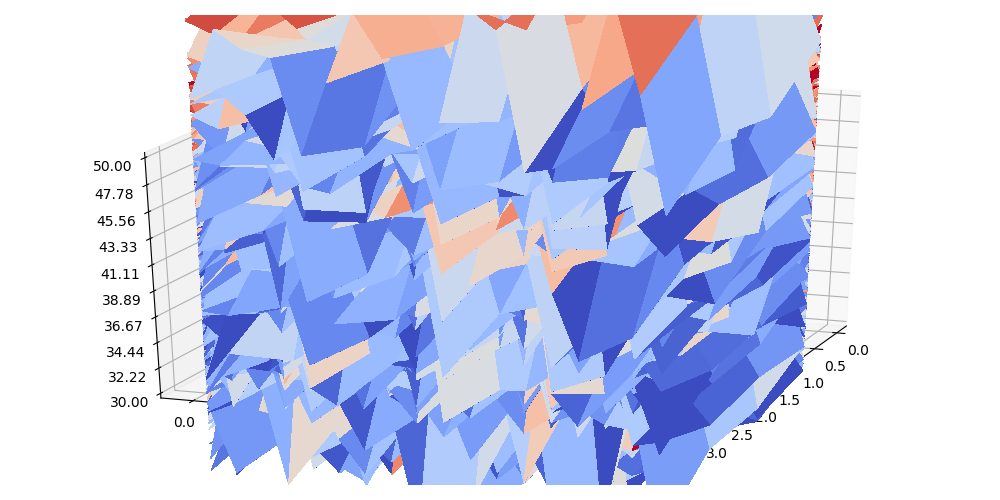

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

Xiall=np.zeros((ix*iy, l_realiz))


def animate(ppp):
    for vv in range(l_realiz):
        for ww in range(ix*iy):
            A=np.random.normal(MeanYi[ww],np.sqrt(Cy[ww,ww]),size=(1))
            Yi[ww,0]=A
        Xi=np.matmul(T, Yi)
        Xiall[0:ix*iy,vv:vv+1] = Xi
       
    #plt.plot(Xiall)
    #plt.xlabel('% of length of beam')
    #plt.ylabel('Values of Xi')
    #plt.title('Random field realisations')



    #for ppp in range(l_realiz):
     #   Pa=Xiall[:,ppp:ppp+1]
      #  P=Pa.reshape((ix,iy))
       # Z=P
        #surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    #ax.clear()
    Pa=Xiall[:,0:1]
    P=Pa.reshape((ix,iy))   
    Z=P
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)    
    return(surf)



fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, iy, 1)
Y = np.arange(0, ix, 1)
X, Y = np.meshgrid(X, Y)
ani = FuncAnimation(fig, animate, interval=500)
plt.tight_layout()
ax.set_zlim(30, 50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(25, 20)
plt.show()
